In [22]:

import pandas as pd


In [23]:
x_df = pd.read_csv('/home/oleg/Documents/matmod_challeng/X.csv')
y_df = pd.read_csv('/home/oleg/Documents/matmod_challeng/y.csv')


x_vals = x_df.columns
predicted_cols = y_df.columns


merged_df = pd.merge(x_df, y_df, on=["engine_id", "flight_datetime", "flight_phase"])

merged_df = merged_df.dropna(axis=1, how='all')

merged_df = merged_df.drop(x_vals.intersection(predicted_cols) , axis=1)
merged_df = merged_df.dropna(axis=1, how='all')
merged_df = merged_df.fillna(0)
merged_df = merged_df.loc[:,merged_df.apply(pd.Series.nunique) != 1]


to_rm = [  'aircraft_id',  'engine_position', 'number_blades', 'engine_family', 'engine_type', 'manufacturer', 'aircraft_family', 'aircraft_grp', 'ac_manufacturer', 'aircraft_type', ]
merged_df = merged_df.drop(to_rm, axis=1)

In [24]:
x_vals = x_vals.drop(to_rm).drop(['engine_id', 'flight_datetime', 'flight_phase'])
predicted_cols = predicted_cols.drop(['engine_id', 'flight_datetime', 'flight_phase'])


x_vals = x_vals.intersection(merged_df.columns)
predicted_cols = predicted_cols.intersection(merged_df.columns)

In [25]:
train_dataset = merged_df.sample(frac=0.8, random_state=0)
test_dataset = merged_df.drop(train_dataset.index)

In [26]:
train_features = train_dataset[x_vals]
test_features = test_dataset[x_vals]

train_labels = train_dataset['ZTLA_D']
test_labels = test_dataset['ZTLA_D']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

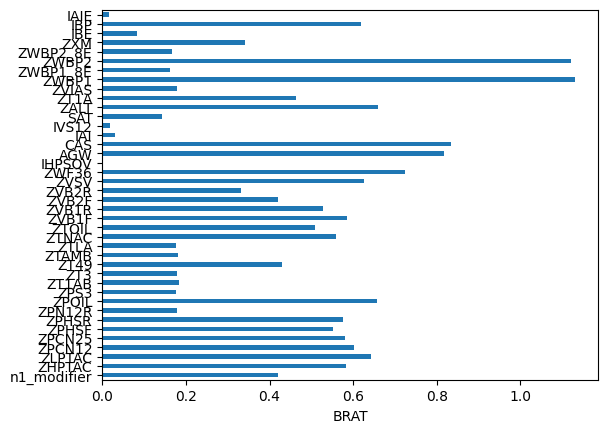

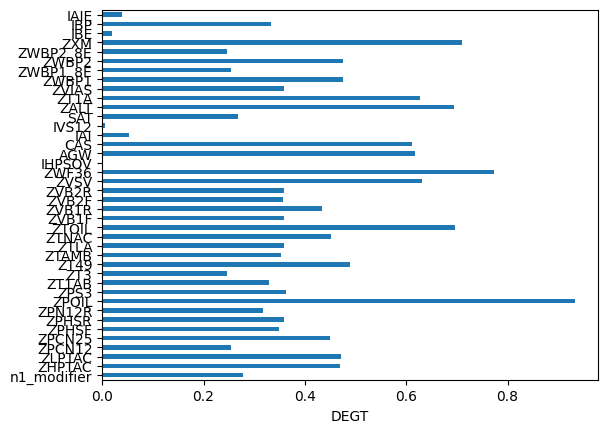

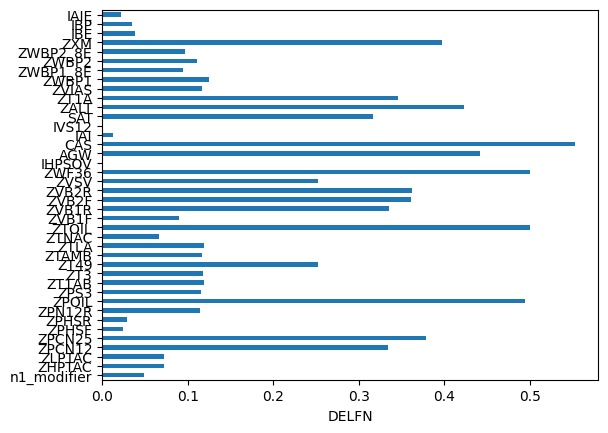

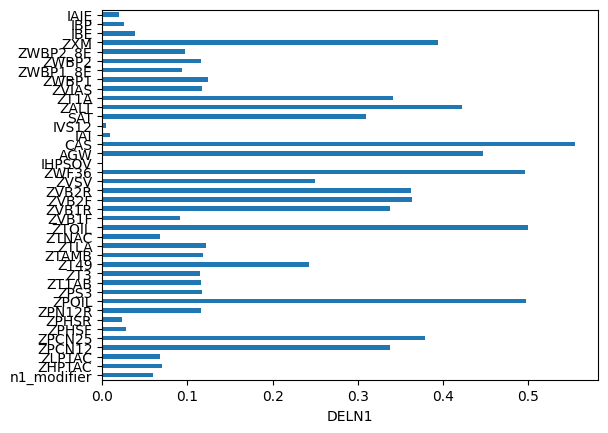

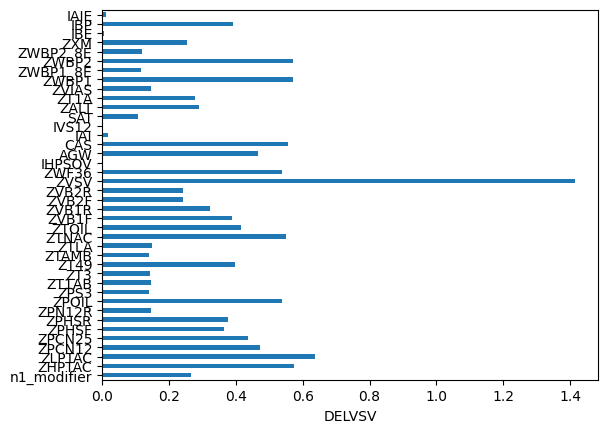

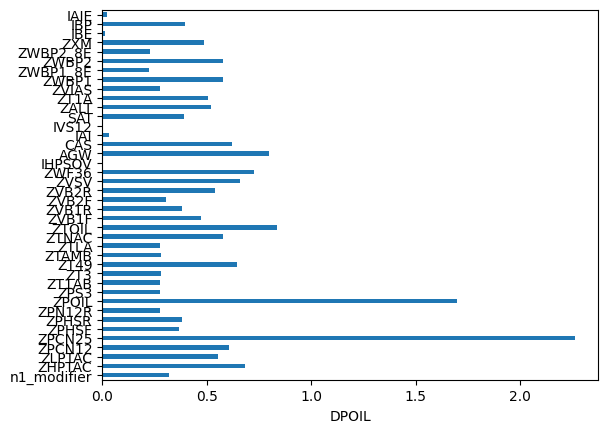

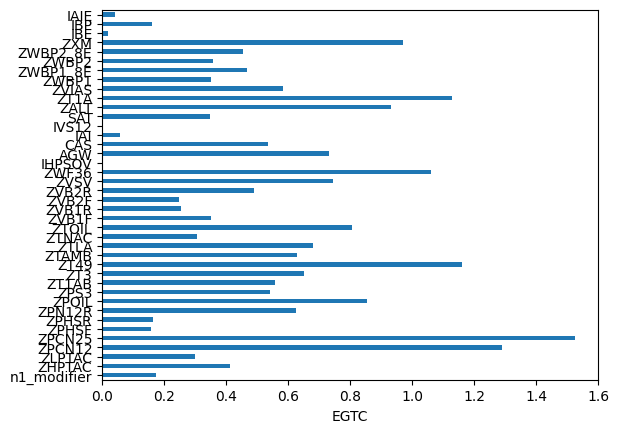

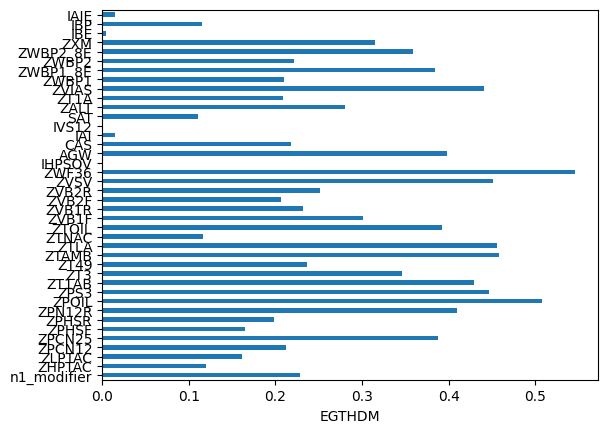

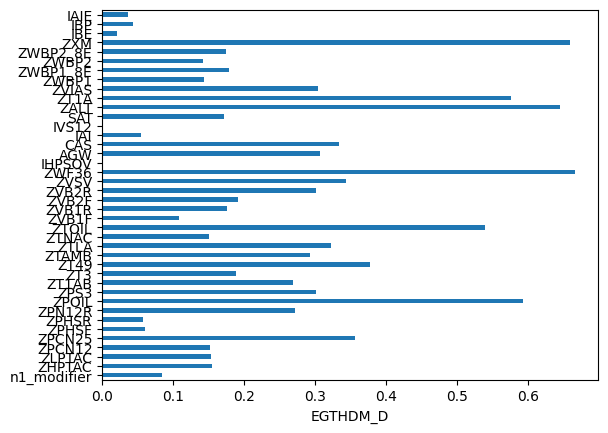

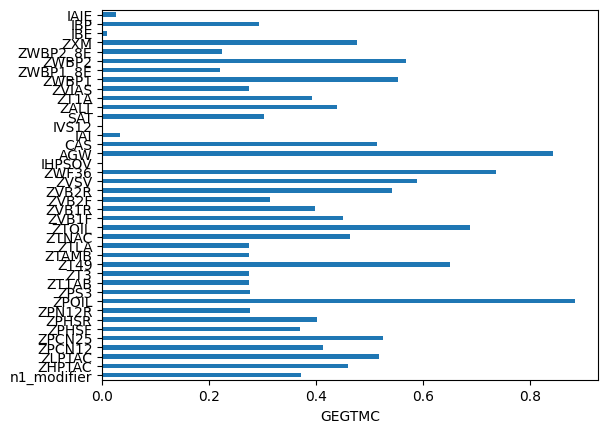

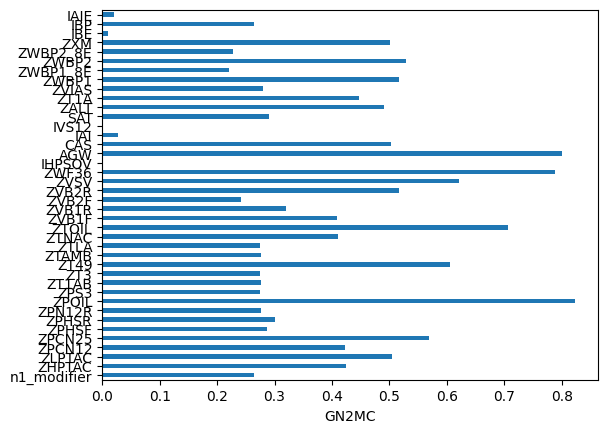

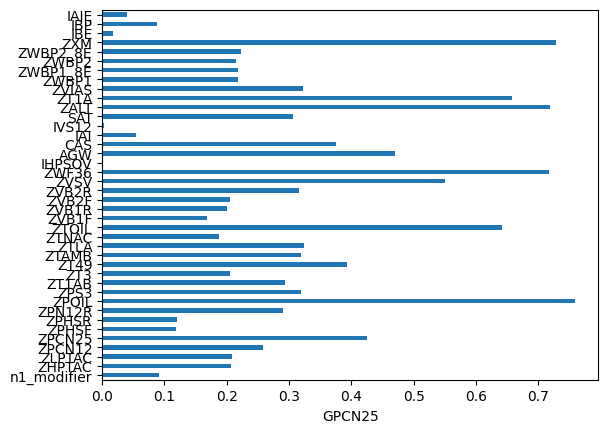

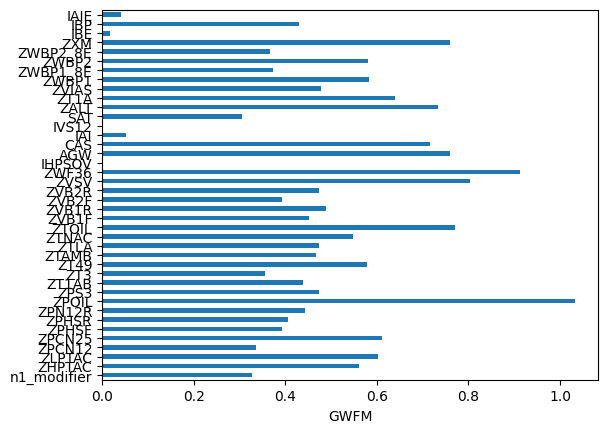

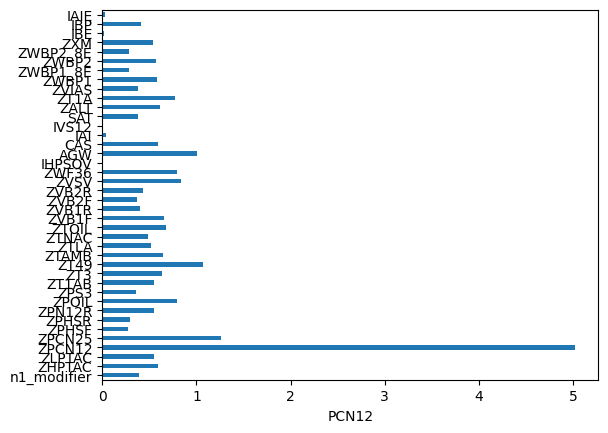

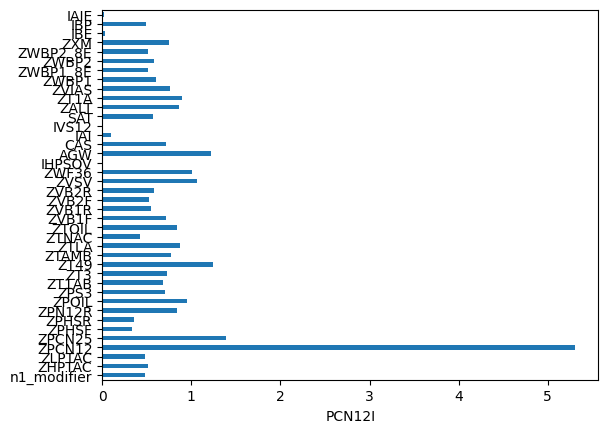

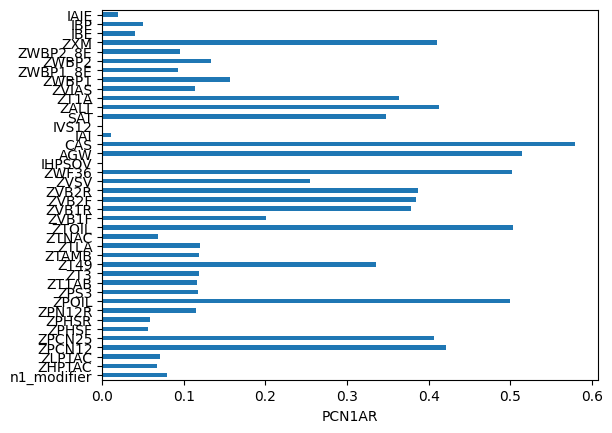

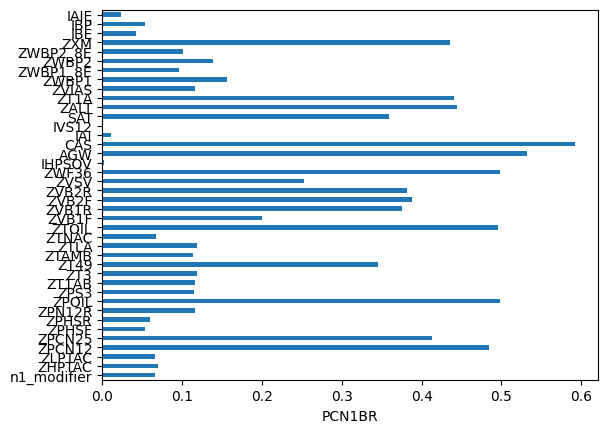

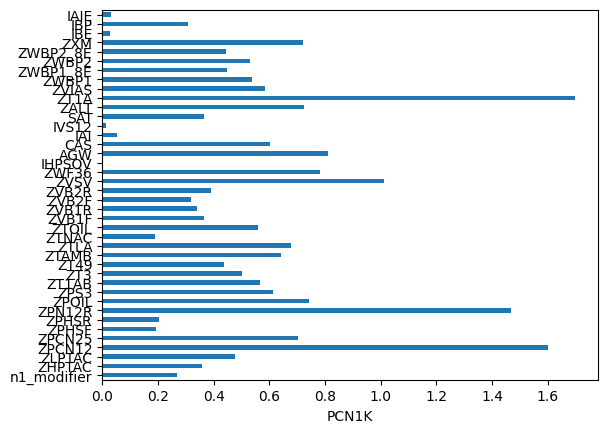

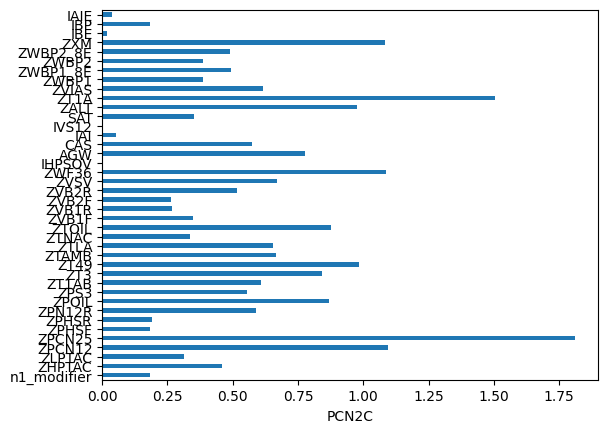

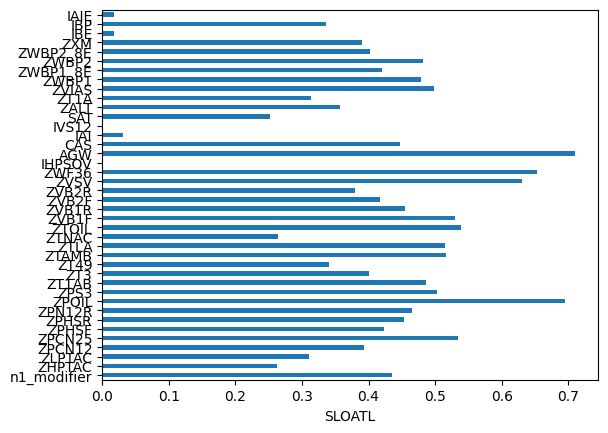

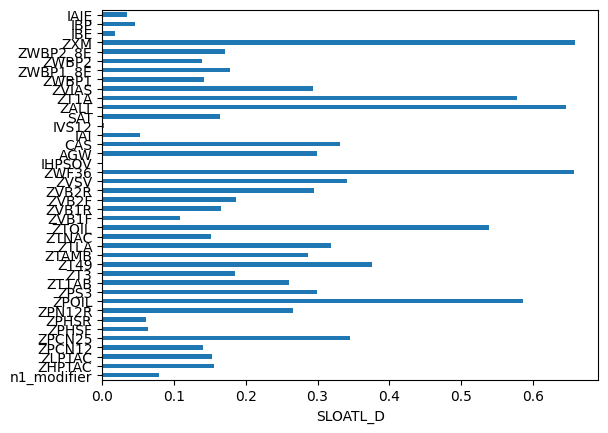

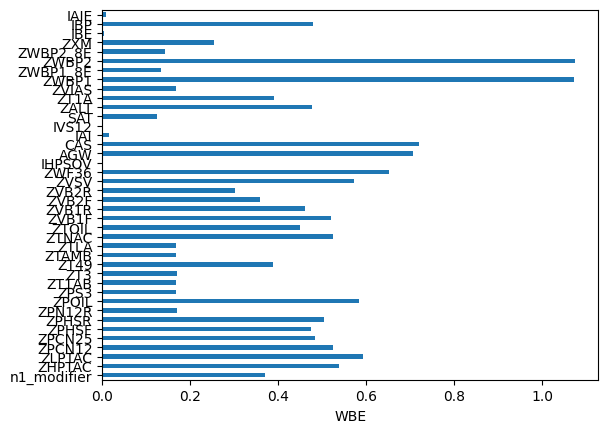

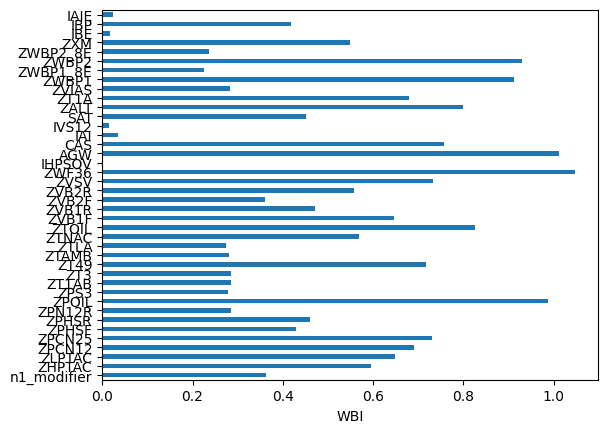

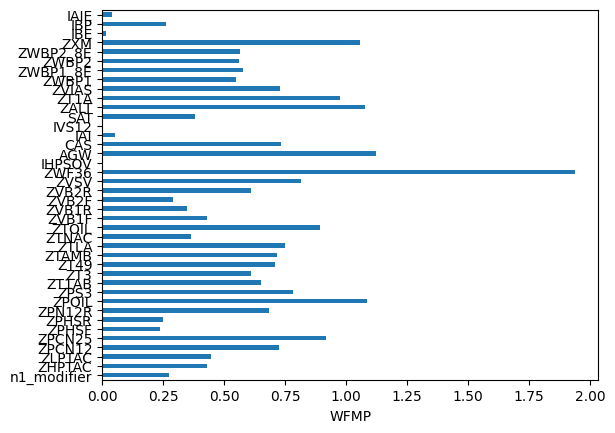

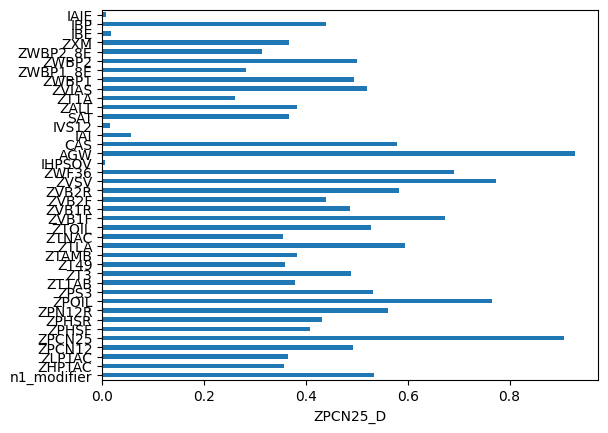

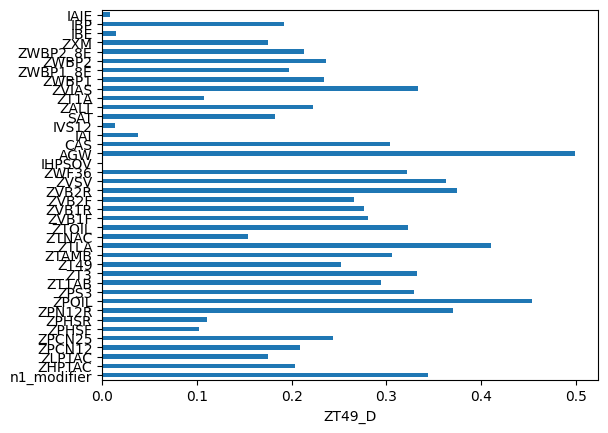

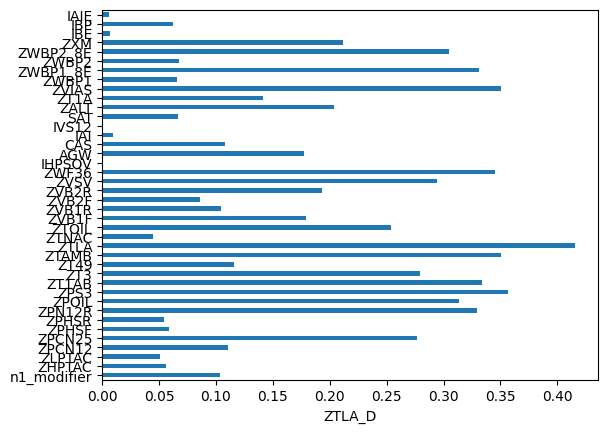

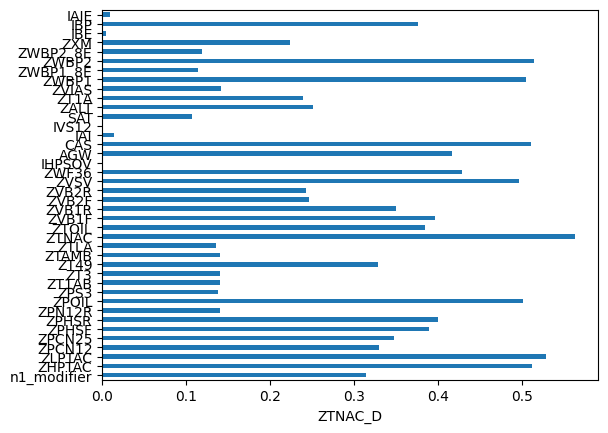

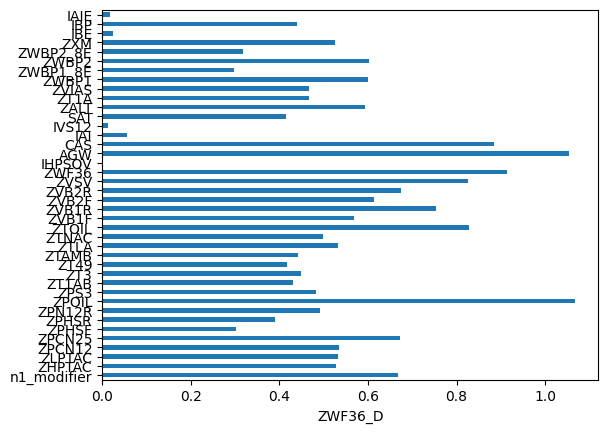

In [27]:
x = merged_df[x_vals]



from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
import matplotlib.pyplot as plt

def mutural(x, y, checked_val_name):
    importances = mutual_info_regression(x, y)
    importances = pd.Series(importances, x.columns)
    importances.plot(kind='barh')

    plt.xlabel(checked_val_name)
    plt.show()
    

    
for y_nam in predicted_cols:
    y = merged_df[y_nam]
    mutural(x, y, y_nam)
